In [25]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
import matplotlib.pyplot as plt


# # 检查torch.cuda是否可用，否则继续使用CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device\n')

Using cuda device



In [26]:
# # FashionMNIST 数据集：
# 训练集
training_data = datasets.FashionMNIST(root="data",             # 存储训练数据的路径
                                      train=True,              # 训练集
                                      download=True,           # 从网络下载
                                      transform=ToTensor())    # 将图片转换为张量
# 测试集
test_data = datasets.FashionMNIST(root="data",                 # 存储测试数据的路径
                                  train=False,                 # 测试集
                                  download=True,               # 从网络下载
                                  transform=ToTensor())        # 将图片转换为张量

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [27]:
# # 使用 DataLoaders 为训练准备数据，train_dataloader是一个可迭代对象
training_dataloader = DataLoader(training_data, batch_size=256, shuffle=True)
print('Len of dataloader:', len(training_dataloader))             # 显示batch的数量
print('Len of dataset:', len(training_dataloader.dataset))        # 显示训练集样本总数量
print('\n')

# 测试一下，第一种读取方法，iter(train_dataloader)返回一个迭代器，使用next()访问
train_features, train_labels = next(iter(training_dataloader))
print('Train_features in a batch run:', train_features, 'shape:', train_features.shape)
print('Train_labels in a batch run:', train_labels, 'shape:', train_labels.shape, '\n')

# 测试一下，第二种读取方法，使用enumerate(dataloader)配合for循环，遍历每个batch
for test_batch, (test_X, test_y) in enumerate(training_dataloader):
    print(test_batch)
    print('Train_features in a batch run:', test_X, 'shape:', test_X.shape)
    print('Train_labels in a batch run:', test_y, 'shape:', test_y.shape, '\n')
    break     # 只显示一个batch


Len of dataloader: 235
Len of dataset: 60000


Train_features in a batch run: tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000,

In [28]:
# # 使用 DataLoaders 为测试准备数据，test_dataloader是一个可迭代对象
test_dataloader = DataLoader(test_data, batch_size=256, shuffle=True)
print('Len of dataloader:', len(test_dataloader))             # 显示batch的数量
print('Len of dataset:', len(test_dataloader.dataset))        # 显示训练集样本总数量
print('\n')

Len of dataloader: 40
Len of dataset: 10000




In [29]:
# # 创建神经网络模型，nn.Module子类
class NeuralNetwork(nn.Module):

    # 初始化网络模型
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()            # 展平层在线性层之前调整网络形状
        self.linear = nn.Linear(28*28, 10)     # 图片大小为28*28像素，因此输入为28*28；分类数为10，因此输出为10
        self.softmax = nn.Softmax(dim=1)       # 对线性层的输出取Softmax，转换为概率

    # 前向传播
    def forward(self, x):
        x = self.flatten(x)
        # print('flatten output：', x, 'shape：', x.shape)
        x = self.linear(x)
        # print('linear output：', x, 'shape：', x.shape)
        x = self.softmax(x)
        # print('softmax output：', x, 'shape：', x.shape)
        return x

In [30]:
# # 实例化NeuralNetwork，并将其移动到device
softmax_net = NeuralNetwork().to(device)

# 测试一下，打印模型结构和参数
print('Model information：', softmax_net)
print('Model parameters：', softmax_net.parameters())
for name, param in softmax_net.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} | Type : {param.dtype}")
print('\n')

# 测试一下，给模型一个输入得到一个输出
train_features_test, train_labels_test = next(iter(training_dataloader))
y_hat_test = softmax_net(train_features_test.to(device))
print(y_hat_test)

Model information： NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
Model parameters： <generator object Module.parameters at 0x0000011B4E6A0EB0>
Layer: linear.weight | Size: torch.Size([10, 784]) | Values : Parameter containing:
tensor([[-1.5489e-02, -2.9827e-02, -9.3831e-03,  ..., -3.1628e-02,
          1.9608e-03,  3.0264e-02],
        [-2.9175e-02, -1.4227e-02, -1.0530e-02,  ...,  3.4028e-02,
         -3.3165e-02,  2.5100e-02],
        [-3.2393e-02,  2.4122e-02, -3.2160e-02,  ..., -2.0401e-02,
         -2.5369e-02,  2.3207e-02],
        ...,
        [-7.4833e-03, -5.8454e-03, -1.3521e-02,  ..., -2.1522e-02,
          3.1728e-02,  2.6952e-02],
        [ 2.0130e-02,  2.7686e-02, -6.0469e-03,  ..., -2.5989e-02,
         -2.0872e-02, -3.4709e-02],
        [ 2.5314e-02,  8.7285e-03,  2.0767e-02,  ...,  3.4146e-02,
         -2.3402e-05, -2.7692e-02]], device='cuda:0', requires_grad=Tr

In [31]:
# # 定义超参数
learning_rate = 0.1
batch_size = 256
epochs = 10


# # 定义损失函数
loss = nn.CrossEntropyLoss()  # 交叉熵损失，CrossEntropyLoss无需对label进行onehot编码


# # 定义优化器
trainer = torch.optim.SGD(softmax_net.parameters(), lr=learning_rate)  # 实例化SGD实例

In [32]:
# #将预测值与真实y值进行比较，获取预测正确的个数，然后除以整个y的长度，即预测正确的概率
def accuracy(y_hat, y):
    # 计算预测正确的数量
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)     # 每一行最大元素值的下标，即预测的分类的类别
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [33]:
# # 定义训练函数，采用第一种读取方法
def train_loop(dataloader, model, loss_fun, optimizer):
    # 训练集样本总数
    train_data_num = len(dataloader.dataset)
    # 初始化正确个数记录
    train_acc_num = 0
    # 累加每个batch的train_loss
    train_loss_sum = 0
    for batch, (X, y) in enumerate(dataloader):
        # 计算预测值
        y_hat = model(X.to(device))
        # 计算损失
        train_loss = loss_fun(y_hat, y.to(device))
        with torch.no_grad():
            # 累加每个batch的损失
            train_loss_sum += train_loss
            # 计算预测正确数
            train_acc_num += accuracy(y_hat, y.to(device))
        # 清除梯度
        optimizer.zero_grad()
        # 反向传播
        train_loss.backward()
        # 更新参数
        optimizer.step()
    # 不计算梯度
    with torch.no_grad():
        print('当前Epoch的训练报告：\n')
        train_loss_average = train_loss_sum / (batch + 1)
        print(f'train_loss: {train_loss_average :f}\n')    # 对所有batch的train_loss取平均，得到平均训练损失
        print(f'train_acc_num: {train_acc_num :f}\n')                # 所有batch中预测正确的总个数
        print(f'train_data_num: {train_data_num :f}\n')
        train_acc_rate = train_acc_num / train_data_num
        print(f'train_acc_rate: {train_acc_rate :f}\n')
    return train_loss_average, train_acc_rate

In [34]:
# # 定义测试函数
def test_loop(dataloader, model, loss_fun):
    # batch的个数
    num_batches = len(dataloader)
    # 测试集样本总数
    test_data_num = len(dataloader.dataset)
    # 初始化正确个数记录
    test_acc_num = 0
    # 初始化test_loss_sum
    test_loss_sum = 0
    # 不计算梯度
    with torch.no_grad():
        for X, y in dataloader:
            # 计算预测值
            y_hat = model(X.to(device))
            # 计算损失的和
            test_loss_sum += loss_fun(y_hat, y.to(device)).item()
            # 计算预测正确数
            test_acc_num += accuracy(y_hat, y.to(device))
        print('当前Epoch的测试报告：\n')
        test_loss_average = test_loss_sum / num_batches
        print(f'test_loss: {test_loss_average :f}\n')     # 对所有batch的test_loss取平均，得到平均测试损失
        print(f'test_acc_num: {test_acc_num :f}\n')
        print(f'test_data_num: {test_data_num :f}\n')
        test_acc_rate = test_acc_num / test_data_num
        print(f'train_acc_rate: {test_acc_rate :f}\n')
    return test_loss_average, test_acc_rate


In [35]:
# 初始化列表，用于存放训练损失、训练准确度、测试损失、测试准确度
list_train_loss = []
list_train_acc_rate = []
list_test_loss = []
list_test_acc_rate = []

In [36]:
# # 进行训练
for i in range(epochs):
    print(f"Epoch {i + 1}\n-------------------------------")
    # 训练
    train_loss_epoch, train_acc_rate_epoch = train_loop(training_dataloader, softmax_net, loss, trainer)
    # 测试
    test_loss_epoch, test_acc_rate_epoch = test_loop(test_dataloader, softmax_net, loss)
    # 将训练损失、训练准确度、测试损失、测试准确度存放至对应列表
    list_train_loss.append(train_loss_epoch.item())
    list_train_acc_rate.append(train_acc_rate_epoch)
    list_test_loss.append(test_loss_epoch)
    list_test_acc_rate.append(test_acc_rate_epoch)
print("Done!")

# # 训练结束后打印超参数
for name, param in softmax_net.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} ")
print('\n')

# # 打印训练损失、训练准确度、测试损失、测试准确度列表
print(range(epochs))
print(list_train_loss)
print(list_train_acc_rate)
print(list_test_loss)
print(list_test_acc_rate)

Epoch 1
-------------------------------
当前Epoch的训练报告：

train_loss: 2.003116

train_acc_num: 31751.000000

train_data_num: 60000.000000

train_acc_rate: 0.529183

当前Epoch的测试报告：

test_loss: 1.874427

test_acc_num: 6693.000000

test_data_num: 10000.000000

train_acc_rate: 0.669300

Epoch 2
-------------------------------
当前Epoch的训练报告：

train_loss: 1.829746

train_acc_num: 41088.000000

train_data_num: 60000.000000

train_acc_rate: 0.684800

当前Epoch的测试报告：

test_loss: 1.804821

test_acc_num: 6981.000000

test_data_num: 10000.000000

train_acc_rate: 0.698100

Epoch 3
-------------------------------
当前Epoch的训练报告：

train_loss: 1.783498

train_acc_num: 43900.000000

train_data_num: 60000.000000

train_acc_rate: 0.731667

当前Epoch的测试报告：

test_loss: 1.775846

test_acc_num: 7371.000000

test_data_num: 10000.000000

train_acc_rate: 0.737100

Epoch 4
-------------------------------
当前Epoch的训练报告：

train_loss: 1.756564

train_acc_num: 45182.000000

train_data_num: 60000.000000

train_acc_rate: 0.753033

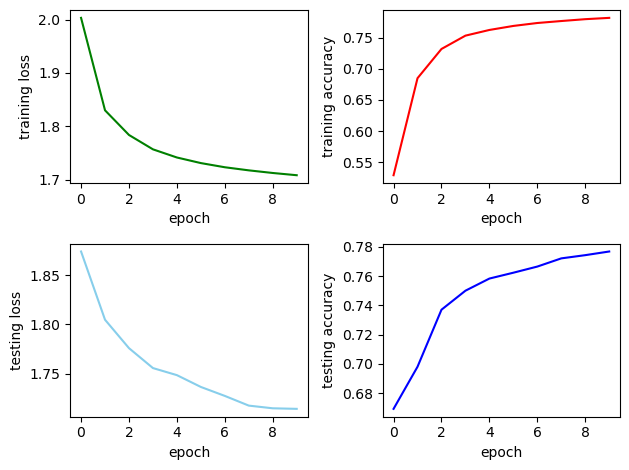

In [37]:
plt.subplot(2, 2, 1)
plt.plot(range(epochs), list_train_loss, color='green', label='training loss')
plt.xlabel('epoch')
plt.ylabel('training loss')

plt.subplot(2, 2, 2)
plt.plot(range(epochs), list_train_acc_rate, color='red', label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('training accuracy')

plt.subplot(2, 2, 3)
plt.plot(range(epochs), list_test_loss,  color='skyblue', label='testing loss')
plt.xlabel('epoch')
plt.ylabel('testing loss')

plt.subplot(2, 2, 4)
plt.plot(range(epochs), list_test_acc_rate, color='blue', label='testing accuracy')
plt.xlabel('epoch')
plt.ylabel('testing accuracy')

plt.tight_layout()
plt.show()